
# Predicting Air Pollution Levels using Linear Models 

This notebook demonstrates the steps to use Linear, Ridge and a Lasso Regression models to predict air pollution levels.

In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score



# Loading the Data 

In [2]:
full_data = pd.read_csv("prepped_data/Full_data.csv") 
full_data.columns

Index(['Hour', 'date', 'NO_ugm3', 'NO2_ugm3', 'O3_ugm3', 'CO_mgm3', 'CO2_mgm3',
       'PM25_ugm3', 'SiteID', 'Lat', 'Long', 'day_of_week', 'avgtempC',
       'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'humidity',
       'winddirDegree', 'windspeedKmph', 'cloudcover', 'precipMM', 'pressure',
       'DCC-AQ1-co', 'DCC-AQ1-no', 'DCC-AQ10-no', 'DCC-AQ13-no', 'DCC-AQ5-no',
       'DCC-AQ6-no', 'DCC-AQ1-no2', 'DCC-AQ10-no2', 'DCC-AQ13-no2',
       'DCC-AQ22-no2', 'DCC-AQ5-no2', 'DCC-AQ6-no2', 'DCC-AQ69-no2',
       'DCC-AQ22-o3', 'DCC-AQ69-o3', 'DCC-AQ10-pm1', 'DCC-AQ13-pm1',
       'DCC-AQ2-pm1', 'DCC-AQ3-pm1', 'DCC-AQ4-pm1', 'DCC-AQ5-pm1',
       'DCC-AQ52-pm1', 'DCC-AQ6-pm1', 'TNO2161-pm1', 'TNO2162-pm1',
       'TNO4435-pm1', 'TNT1088-pm1', 'DCC-AQ10-pm10', 'DCC-AQ13-pm10',
       'DCC-AQ2-pm10', 'DCC-AQ22-pm10', 'DCC-AQ3-pm10', 'DCC-AQ4-pm10',
       'DCC-AQ5-pm10', 'DCC-AQ52-pm10', 'DCC-AQ6-pm10', 'TNO2161-pm10',
       'TNO2162-pm10', 'TNO4435-pm10', 'TNT1088-pm10', 'DCC-AQ10-pm2_

In [3]:
df_test = full_data[full_data['date'] >= '2022-05-01']
df_train = full_data[full_data['date'] < '2022-05-01']

In [4]:
# #Split train into X and Y
Xtrain = df_train.iloc[:, 8:].values
ytrain = df_train["PM25_ugm3"].values

# #Split test into X and Y
Xtest = df_test.iloc[:, 8:].values
ytest = df_test["PM25_ugm3"].values


# Hot One Encoding

In [5]:
# Assuming you know the names of the categorical columns
categorical_columns = ['SiteID', 'day_of_week']  # List of categorical column names

# Convert arrays back to DataFrame for easier manipulation
Xtrain_df = pd.DataFrame(Xtrain, columns=df_train.columns[8:])
Xtest_df = pd.DataFrame(Xtest, columns=df_test.columns[8:])

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the training data
encoder.fit(Xtrain_df[categorical_columns])

# Transform both training and test data
Xtrain_encoded = encoder.transform(Xtrain_df[categorical_columns])
Xtest_encoded = encoder.transform(Xtest_df[categorical_columns])

# Create DataFrames from the encoded arrays, include column names for easier merging
encoded_columns = encoder.get_feature_names_out(categorical_columns)
Xtrain_encoded_df = pd.DataFrame(Xtrain_encoded, columns=encoded_columns)
Xtest_encoded_df = pd.DataFrame(Xtest_encoded, columns=encoded_columns)

# Drop the original categorical columns and concat the new encoded columns
Xtrain_final = pd.concat([Xtrain_df.drop(categorical_columns, axis=1), Xtrain_encoded_df], axis=1)
Xtest_final = pd.concat([Xtest_df.drop(categorical_columns, axis=1), Xtest_encoded_df], axis=1)


c:\Users\Giulia Maria\miniconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Mean Imputation 

In [6]:
# np.random.seed(0)   
# # imputing 
# imputer = SimpleImputer(strategy="mean")
# Xtrain_1 = imputer.fit_transform(Xtrain_final)  # Impute
# Xtest_1 = imputer.transform(Xtest_final)  # Impute

# # Convert back to DataFrame
# Xtrain_1 = pd.DataFrame(Xtrain_1, columns=Xtrain_final.columns)
# Xtest_1 = pd.DataFrame(Xtest_1, columns=Xtest_final.columns)

# # scaling 
# scaler = StandardScaler()
# Xtrain_1 = scaler.fit_transform(Xtrain_1)  # Scale
# Xtest_1 = scaler.transform(Xtest_1)  # Scale

# # Convert back to DataFrame
# Xtrain_1 = pd.DataFrame(Xtrain_1, columns=Xtrain_final.columns)
# Xtest_1 = pd.DataFrame(Xtest_1, columns=Xtest_final.columns)

# KNN Imputation

This final py file only retains the analysis conducted with KNN imputation,as it yields slightly better results

In [7]:
# np.random.seed(0)   

# imputer = KNNImputer(n_neighbors=5)
# Xtrain_KNN = imputer.fit_transform(Xtrain_final)
# Xtest_KNN = imputer.transform(Xtest_final)

# # Convert back to DataFrame
# Xtrain_2 = pd.DataFrame(Xtrain_KNN, columns=Xtrain_final.columns)
# Xtest_2 = pd.DataFrame(Xtest_KNN, columns=Xtest_final.columns)

# Xtrain = scaler.fit_transform(Xtrain_2)
# Xtest = scaler.transform(Xtest_2)

# # Convert back to DataFrame
# Xtrain_KNN = pd.DataFrame(Xtrain, columns=Xtrain_final.columns)
# Xtest_KNN = pd.DataFrame(Xtest, columns=Xtest_final.columns)

In [6]:
# # mine

Xtrain_KNN_encoded = pd.read_csv("prepped_data/Xtrain_KNN_encoded.csv")
Xtest_KNN_encoded = pd.read_csv("prepped_data/Xtest_KNN_encoded.csv")   


# Linear Regression

### Train the model 

In [39]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Reset index of Xtrain_KNN_encoded
Xtrain_KNN_encoded.reset_index(drop=True, inplace=True)

# Define the number of splits (e.g., 5 splits)
n_splits = 5

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize the Linear Regression
linear = LinearRegression()




### Prediction on Test Set

In [40]:
# Perform cross-validation
cv_scores = []
for train_index, test_index in tscv.split(Xtrain_KNN_encoded):
    X_train, X_test = Xtrain_KNN_encoded.iloc[train_index], Xtrain_KNN_encoded.iloc[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]

    # Train the model
    linear.fit(X_train, y_train)

    # Predict on the test set
    y_pred_linear = linear.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    cv_scores.append(rmse)

# Print cross-validation RMSE scores
print("Cross-Validation RMSE scores- Linear Regression:", cv_scores)
print("Mean Cross-Validation RMSE- Linear Regression:", np.mean(cv_scores))

Cross-Validation RMSE scores- Linear Regression: [29605783684150.875, 1959147652974.9336, 43753461400.20541, 3650127824046.4736, 6.389503872804933]
Mean Cross-Validation RMSE- Linear Regression: 7051762524515.776


### Features Importance

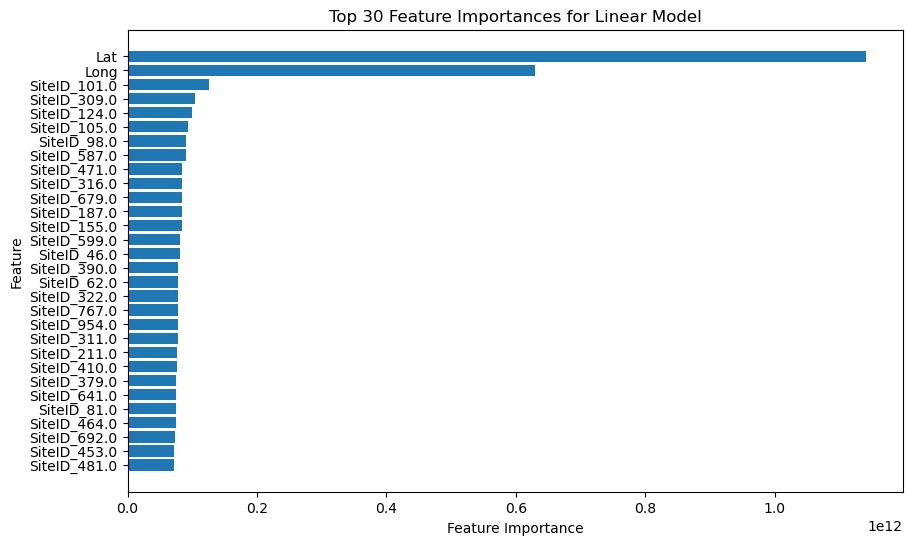

In [41]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = linear.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Linear Model'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

# Ridge 

### Train the model 

In [7]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Reset index of Xtrain_KNN_imputed
Xtrain_KNN_encoded.reset_index(drop=True, inplace=True)

# Define the number of splits (e.g., 5 splits)
n_splits = 5

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize the Random Forest Regressor
ridge = Ridge(alpha=0.5, 
              solver='sag', 
              max_iter=1000, 
              tol=0.001, 
              fit_intercept=True, 
              random_state=123)


# Perform cross-validation
cv_scores = []
for train_index, test_index in tscv.split(Xtrain_KNN_encoded):
    X_train, X_test = Xtrain_KNN_encoded.iloc[train_index], Xtrain_KNN_encoded.iloc[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]

    # Train the model
    ridge.fit(X_train, y_train)

    # Predict on the test set
    y_pred_ridge = ridge.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    cv_scores.append(rmse)

# Print cross-validation RMSE scores
print("Cross-Validation RMSE scores - Ridge: ", cv_scores)
print("Mean Cross-Validation RMSE - Ridge:", np.mean(cv_scores))

Cross-Validation RMSE scores - Ridge:  [7.654100784672364, 8.712261447539658, 7.494238314678804, 6.901771451678697, 6.335530715533991]
Mean Cross-Validation RMSE - Ridge: 7.419580542820702


### Select the Best Alpha

In [8]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # This creates 20 logarithmically spaced values between 10^-4 and 10^4.
}

# Initialize the Ridge
ridge = Ridge(solver='sag', 
              max_iter=1000, 
              tol=0.001, 
              fit_intercept=True, 
              random_state=123)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(estimator=ridge, 
                           param_grid=param_grid, 
                           cv=tscv, scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1) # grid_search.fit(X_train_subset, y_train_subset)

grid_search.fit(Xtrain_KNN_encoded, ytrain)

# Best hyperparameters
best_params = grid_search.best_params_['alpha']
print("Best parameter - Ridge:", grid_search.best_params_)
print("Best RMSE - Ridge:", np.sqrt(-grid_search.best_score_))

# best_alpha = grid_search.best_params_['alpha']
# print("Best parameters: alpha =", best_alpha)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter - Ridge: {'alpha': 10000.0}
Best RMSE - Ridge: 7.227126269258836


### Predict and Evaluate the Model

In [19]:
best_params = {'alpha': 10000.0}
# Initialize Ridge with best alpha
best_ridge = Ridge(random_state=123, **best_params) # **best_params

# Train the model on the full training data
best_ridge.fit(Xtrain_KNN_encoded, ytrain)

# Make predictions on the test set
y_pred_ridge = best_ridge.predict(Xtest_KNN_encoded)

# Calculate RMSE on the test set
test_rmse_ridge = np.sqrt(mean_squared_error(ytest, y_pred_ridge))
print("Test RMSE - Ridge:", test_rmse_ridge)

# Calculate R-squared score
r2_ridge = r2_score(ytest, y_pred_ridge)
print("R-squared - Ridge:", r2_ridge)

Test RMSE - Ridge: 5.256103779403499
R-squared - Ridge: 0.07991032592188596


### Features importance

In [26]:
# # Get feature names (assuming you have them stored in a list)
# feature_names = best_ridge.feature_names_in_ # Replace with your actual feature names

# # Pair feature names with coefficients
# feature_coef_pairs = zip(feature_names, best_ridge.coef_)

# # Sort features by coefficient magnitude
# sorted_features = sorted(feature_coef_pairs, key=lambda x: abs(x[1]), reverse=True)

# # Print the top N most important features
# top_n = 30
# # for feature, coef in sorted_features[:top_n]:
# #     print(f"Feature: {feature}, Coefficient: {coef}")

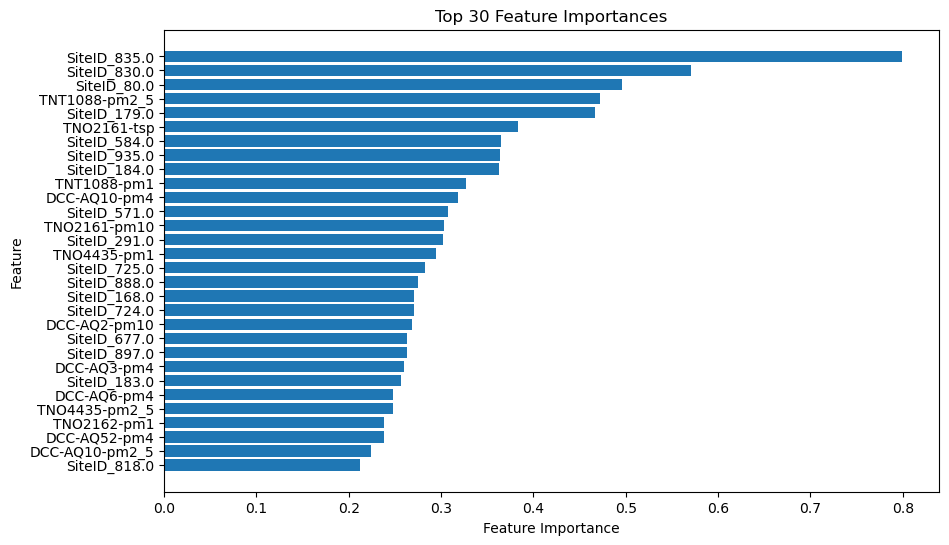

In [25]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = best_ridge.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Ridge Regression'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

# Lasso 

### Train the Model

In [28]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Reset index of Xtrain_KNN_imputed
Xtrain_KNN_encoded.reset_index(drop=True, inplace=True)

# Define the number of splits (e.g., 5 splits)
n_splits = 5

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize the Lasso Regression
lasso = Lasso(alpha=0.1, 
              fit_intercept=True, 
              max_iter=10000, 
              tol=0.0001, 
              random_state=123,
                selection='random')

# Perform cross-validation
cv_scores = []
for train_index, test_index in tscv.split(Xtrain_KNN_encoded):
    X_train, X_test = Xtrain_KNN_encoded.iloc[train_index], Xtrain_KNN_encoded.iloc[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]

    # Train the model
    lasso.fit(X_train, y_train)

    # Predict on the test set
    y_pred_lasso = lasso.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    cv_scores.append(rmse)

# Print cross-validation RMSE scores
print("Cross-Validation RMSE scores - Lasso: ", cv_scores)
print("Mean Cross-Validation RMSE - Lasso:", np.mean(cv_scores))

Cross-Validation RMSE scores - Lasso:  [7.223932041569019, 8.631264934519043, 7.560406997749526, 6.719222711110426, 6.290046919827693]
Mean Cross-Validation RMSE - Lasso: 7.284974720955143


### Select the Best Alpha

In [30]:
# If taking too long: Define a subset of data for tuning
# subset_size = 15000
# X_train_subset, y_train_subset = Xtrain_KNN_encoded[:subset_size], ytrain[:subset_size]

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # This creates 20 logarithmically spaced values between 10^-4 and 10^4.
}

# Initialize the Lasso
lasso_model = Lasso(fit_intercept=True, 
                    max_iter=10000, 
                    tol=0.0001,
                    random_state=42, 
                    selection='random')


# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(estimator=lasso, 
                           param_grid=param_grid, 
                           cv=tscv, scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1) # grid_search.fit(X_train_subset, y_train_subset)

grid_search.fit(Xtrain_KNN_encoded, ytrain)

# Best hyperparameters
best_params = grid_search.best_params_['alpha']
print("Best parameter - Lasso:", grid_search.best_params_)
print("Best RMSE - Lasso:", np.sqrt(-grid_search.best_score_))

# best_alpha = grid_search.best_params_['alpha']
# print("Best parameters: alpha =", best_alpha)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter - Lasso: {'alpha': 0.08858667904100823}
Best RMSE - Lasso: 7.327600824118896


### Predict and Evaluate the Model

In [33]:
best_params = {'alpha': 0.08858667904100823}
# Initialize Ridge with best alpha
best_lasso = Lasso(random_state=123, **best_params) # **best_params

# Train the model on the full training data
best_lasso.fit(Xtrain_KNN_encoded, ytrain)

# Make predictions on the test set
y_pred_lasso = best_lasso.predict(Xtest_KNN_encoded)

# Calculate RMSE on the test set
test_rmse_lasso = np.sqrt(mean_squared_error(ytest, y_pred_lasso))
print("Test RMSE - Lasso:", test_rmse_lasso)

# Calculate R-squared score
r2_lasso = r2_score(ytest, y_pred_lasso)
print("R-squared - Lasso:", r2_lasso)

Test RMSE - Lasso: 5.202320115571579
R-squared - Lasso: 0.09864382562457297


### Features Importance

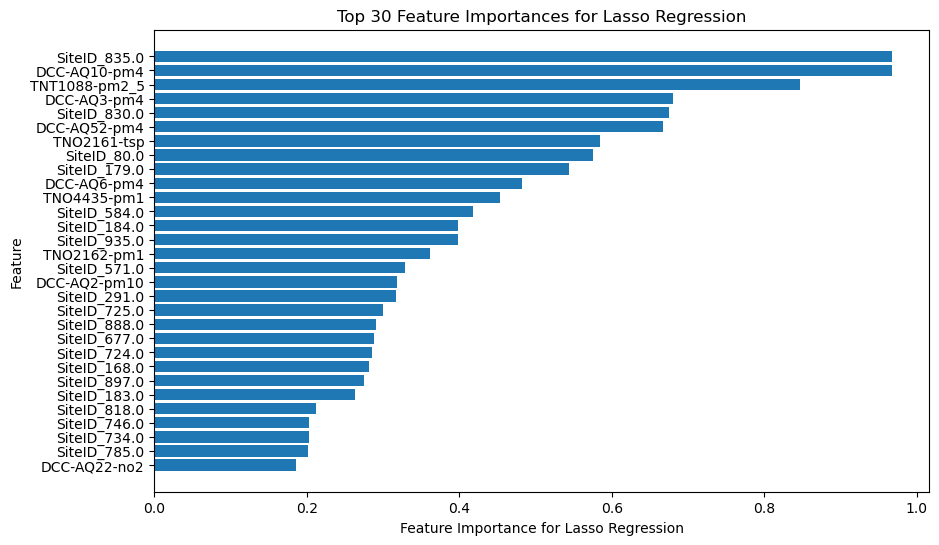

In [34]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = best_lasso.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance for Lasso Regression')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Lasso Regression'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

# Comparisons between the models 


Lasso has the best R-squared result of 0.097. However, the value of suggests that the model explains only about 9.7% of the variance.